# ✅ Washington DC Rental Data — EDA Notebook

In [2]:

# -----------------------------------------------------------
# 📘 Washington DC Bike Rental — EDA Notebook
# -----------------------------------------------------------

# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)

# -----------------------------------------------------------
# 1. 데이터 로드
# -----------------------------------------------------------
path = "../../Data/interim/washington/dc_rental_data.csv"  # 사용자 경로에 맞게 수정
df = pd.read_csv(path, low_memory=False)

print("데이터셋 크기:", df.shape)
df.head()


데이터셋 크기: (1402340, 81)


,NAME,lat,lon,date,quarter of day,month,weekend,rental_count,used_time(avg),used_dis(avg),...,temperature,humidity,windspeed,cloud_cover,shortwave_radiation,precipitation,rain,snowfall,snow_depth,weathersit
0,10th & E St NW,38.895914,-77.026064,2021-01-01,3,1,0,1,0 days 00:07:38,991.205593,...,3.00,91.33,7.37,100.00,40.17,5.9,5.9,0.0,0.0,3
1,10th & E St NW,38.895914,-77.026064,2021-01-02,2,1,1,4,0 days 00:12:09.250000,1647.225478,...,7.95,86.67,9.77,75.83,165.17,0.0,0.0,0.0,0.0,2
2,10th & E St NW,38.895914,-77.026064,2021-01-02,3,1,1,8,0 days 01:08:14.250000,245.342094,...,10.92,70.00,13.82,87.33,158.00,0.0,0.0,0.0,0.0,2
3,10th & E St NW,38.895914,-77.026064,2021-01-03,2,1,1,1,0 days 00:02:39,368.148128,...,3.67,92.00,9.62,91.67,44.50,3.3,3.3,0.0,0.0,3
4,10th & E St NW,38.895914,-77.026064,2021-01-04,3,1,0,7,0 days 00:08:58.714285714,1456.604536,...,7.10,68.50,8.62,88.00,137.00,0.0,0.0,0.0,0.0,2


## 기본 정보

In [3]:

# -----------------------------------------------------------
# 2. 기본 정보 탐색
# -----------------------------------------------------------
df.info()
df.isnull().sum().sort_values(ascending=False).head(20)
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402340 entries, 0 to 1402339
Data columns (total 81 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   NAME                            1402340 non-null  object 
 1   lat                             1402340 non-null  float64
 2   lon                             1402340 non-null  float64
 3   date                            1402340 non-null  object 
 4   quarter of day                  1402340 non-null  int64  
 5   month                           1402340 non-null  int64  
 6   weekend                         1402340 non-null  int64  
 7   rental_count                    1402340 non-null  int64  
 8   used_time(avg)                  1402340 non-null  object 
 9   used_dis(avg)                   1400837 non-null  float64
 10  X                               1402340 non-null  float64
 11  Y                               1402340 non-null  float64
 12  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NAME,1402340,505,New Hampshire Ave & T St NW,6488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,1402340.0,NaN,NaN,NaN,38.907493,0.029467,38.812351,38.892164,38.902674,38.920682,39.00048
lon,1402340.0,NaN,NaN,NaN,-77.030931,0.033415,-77.127776,-77.049383,-77.0315,-77.005965,-76.913188
date,1402340,1642,2024-09-12,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter of day,1402340.0,NaN,NaN,NaN,1.728808,1.121224,0.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
precipitation,1402340.0,NaN,NaN,NaN,0.826901,2.979623,0.0,0.0,0.0,0.1,61.2
rain,1402340.0,NaN,NaN,NaN,0.813679,2.96909,0.0,0.0,0.0,0.1,61.2
snowfall,1402340.0,NaN,NaN,NaN,0.009286,0.171446,0.0,0.0,0.0,0.0,11.41
snow_depth,1402340.0,NaN,NaN,NaN,0.003256,0.016127,0.0,0.0,0.0,0.0,0.16


## 날짜/시간 파싱

In [4]:

# -----------------------------------------------------------
# 3. 날짜 처리
# -----------------------------------------------------------
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek
df["weekday_name"] = df["date"].dt.day_name()
df.head()


,NAME,lat,lon,date,quarter of day,month,weekend,rental_count,used_time(avg),used_dis(avg),...,shortwave_radiation,precipitation,rain,snowfall,snow_depth,weathersit,year,day,dayofweek,weekday_name
0,10th & E St NW,38.895914,-77.026064,2021-01-01,3,1,0,1,0 days 00:07:38,991.205593,...,40.17,5.9,5.9,0.0,0.0,3,2021,1,4,Friday
1,10th & E St NW,38.895914,-77.026064,2021-01-02,2,1,1,4,0 days 00:12:09.250000,1647.225478,...,165.17,0.0,0.0,0.0,0.0,2,2021,2,5,Saturday
2,10th & E St NW,38.895914,-77.026064,2021-01-02,3,1,1,8,0 days 01:08:14.250000,245.342094,...,158.00,0.0,0.0,0.0,0.0,2,2021,2,5,Saturday
3,10th & E St NW,38.895914,-77.026064,2021-01-03,2,1,1,1,0 days 00:02:39,368.148128,...,44.50,3.3,3.3,0.0,0.0,3,2021,3,6,Sunday
4,10th & E St NW,38.895914,-77.026064,2021-01-04,3,1,0,7,0 days 00:08:58.714285714,1456.604536,...,137.00,0.0,0.0,0.0,0.0,2,2021,4,0,Monday


## Rental Count 기본 분석

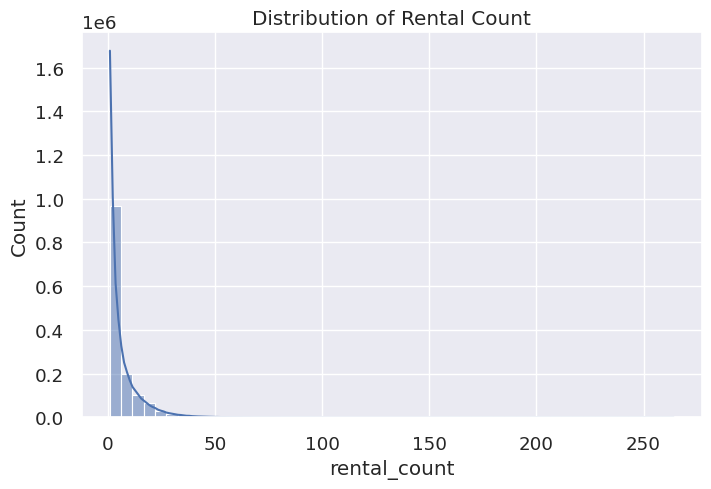

In [10]:
# -----------------------------------------------------------
# 4. Rental Count 기본 분석
# -----------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["rental_count"], bins=50, kde=True)
plt.title("Distribution of Rental Count")
plt.show()


### 시간대 (Quarter of Day) 별 평균 수요

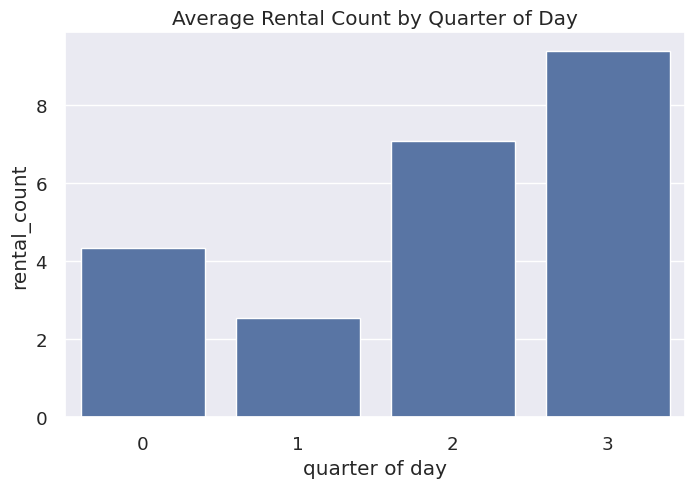

In [11]:
# quarter of day
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="quarter of day", y="rental_count", errorbar=None)
plt.title("Average Rental Count by Quarter of Day")
plt.show()

### 요일별 평균 수요

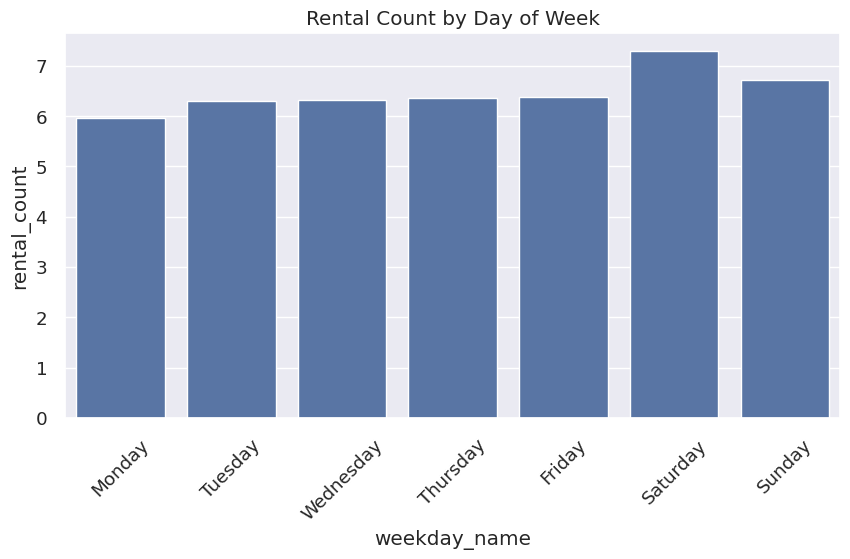

In [12]:
# weekday order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="weekday_name", y="rental_count", order=order, errorbar=None)
plt.title("Rental Count by Day of Week")
plt.xticks(rotation=45)
plt.show()

### 월별 수요 변화

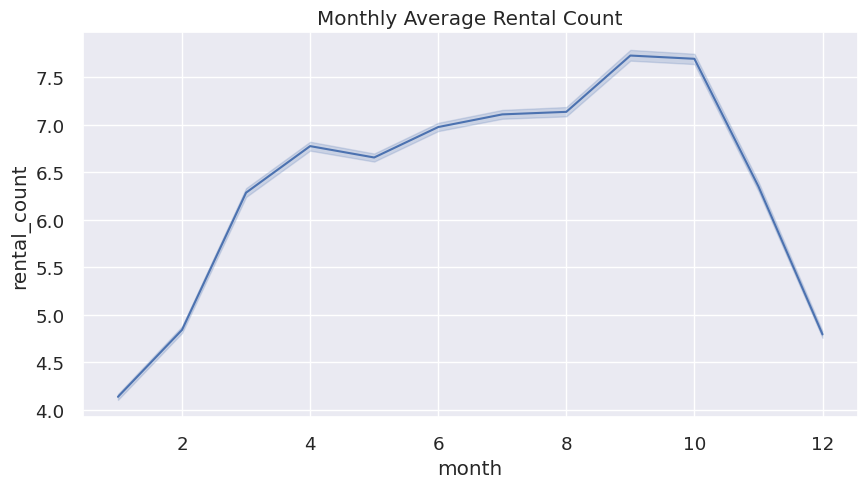

In [13]:
# monthly trend
plt.figure(figsize=(10,5))
sns.lineplot(x=df["month"], y=df["rental_count"])
plt.title("Monthly Average Rental Count")
plt.show()

## Weather Feature 분석

### 날씨 변수 히스토그램

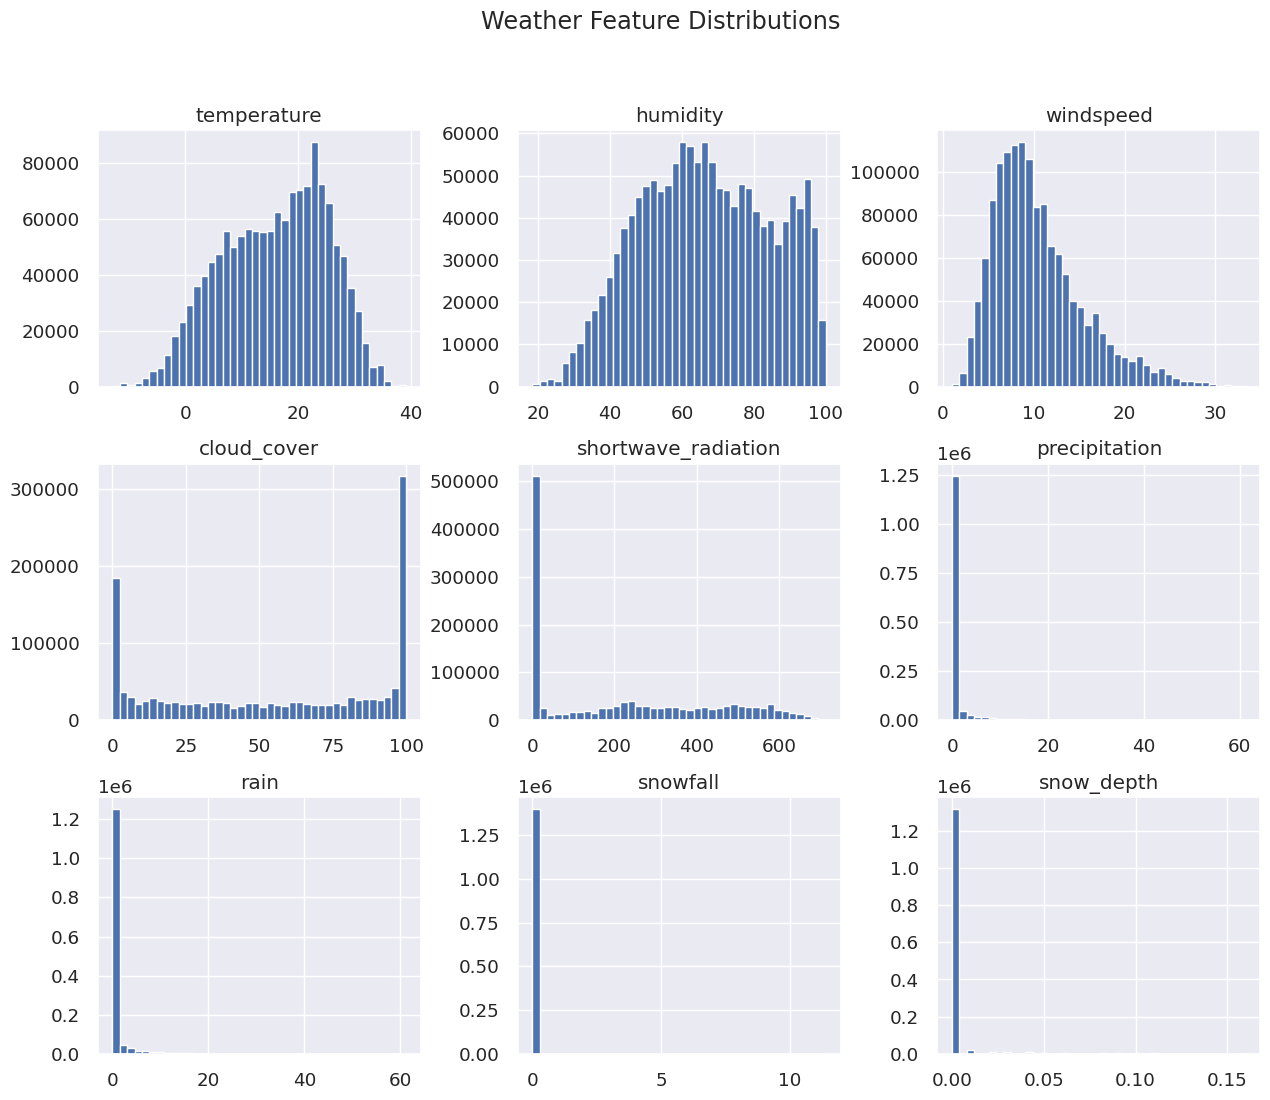

In [8]:

# -----------------------------------------------------------
# 5. Weather Feature 분석
# -----------------------------------------------------------
weather_cols = [
    "temperature","humidity","windspeed","cloud_cover",
    "shortwave_radiation","precipitation","rain","snowfall","snow_depth"
]

df[weather_cols].hist(figsize=(15,12), bins=40)
plt.suptitle("Weather Feature Distributions")
plt.show()


### 날씨와 수요의 상관관계

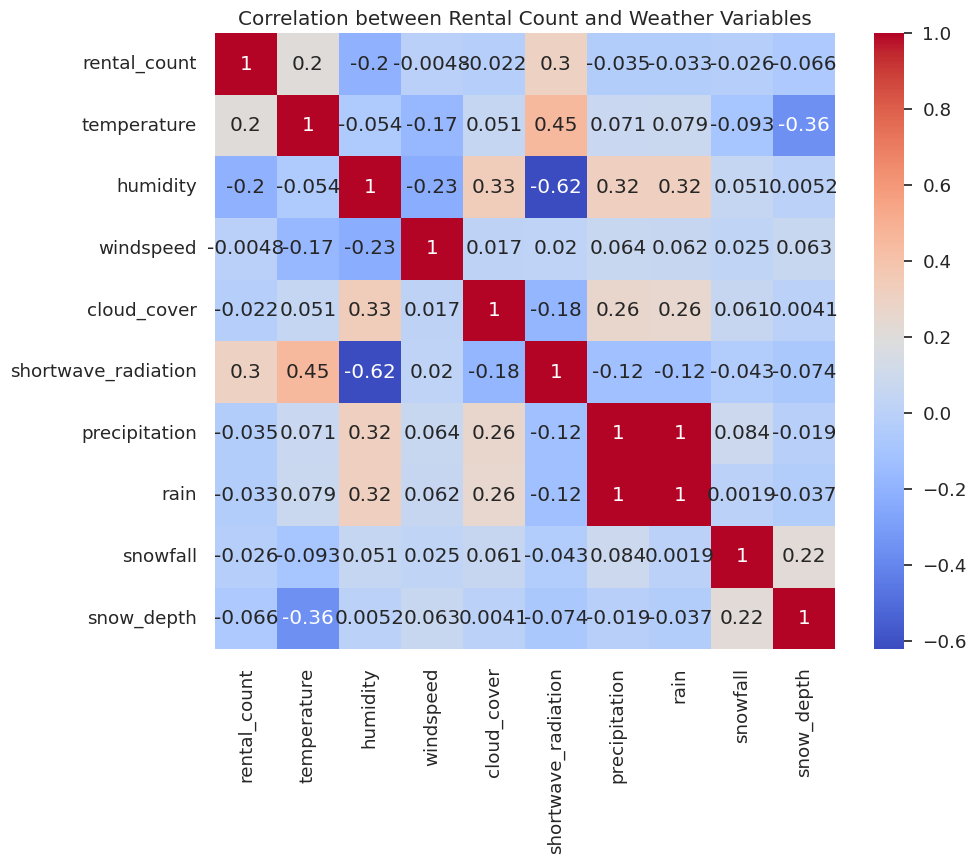

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["rental_count"] + weather_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Rental Count and Weather Variables")
plt.show()

## POI 분석

### POI 거리와 수요의 관계

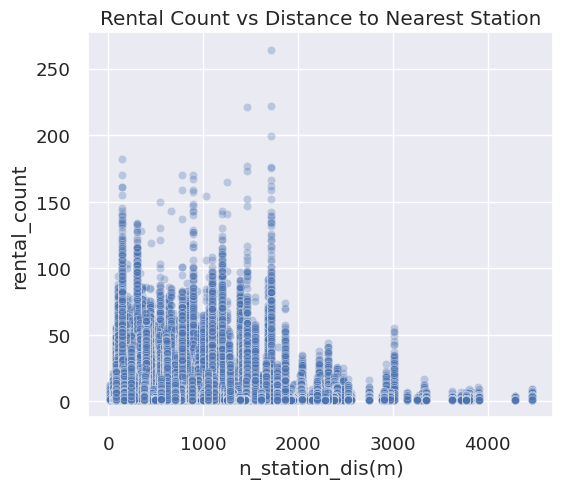

In [14]:

# -----------------------------------------------------------
# 6. Spatial Feature (POI) 분석
# -----------------------------------------------------------
poi_cols = [col for col in df.columns if "station" in col or "bus" in col or "park" in col or "school" in col]
df[poi_cols].head()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="n_station_dis(m)", y="rental_count", alpha=0.3)
plt.title("Rental Count vs Distance to Nearest Station")
plt.show()

### 반경 내 POI 개수와 수요

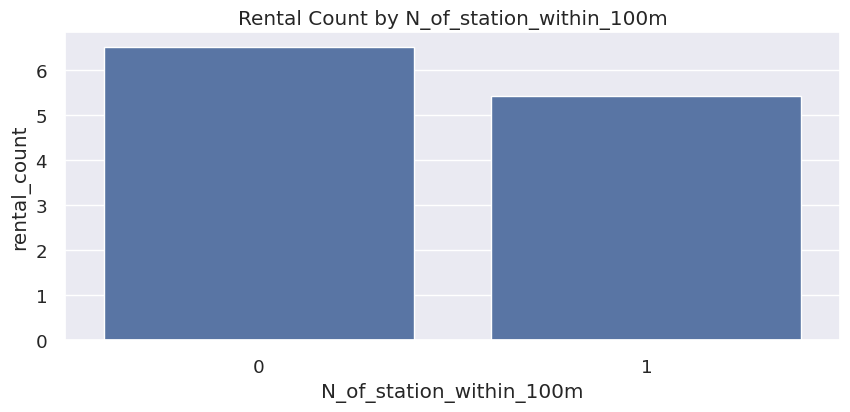

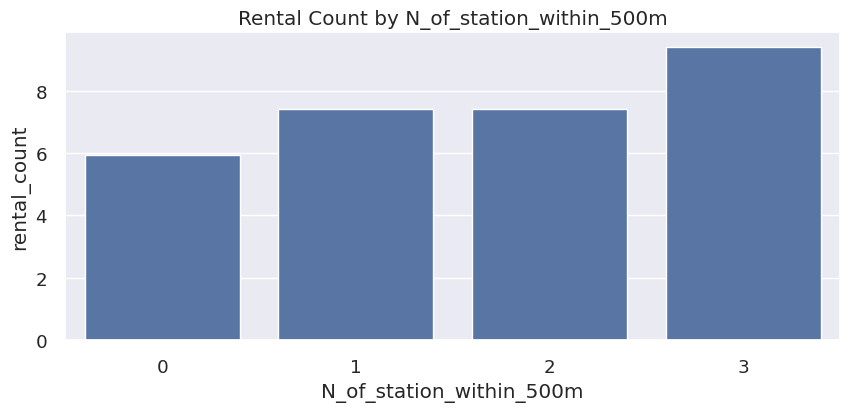

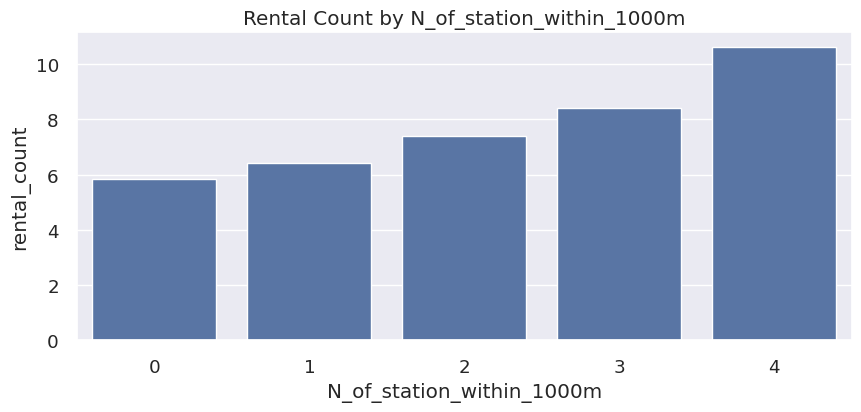

In [16]:

cols = [
    "N_of_station_within_100m",
    "N_of_station_within_500m",
    "N_of_station_within_1000m"
]

for c in cols:
    plt.figure(figsize=(10,4))
    sns.barplot(data=df, x=c, y="rental_count", errorbar=None)  # ← 수정됨!
    plt.title(f"Rental Count by {c}")
    plt.show()

## 사용 시간 분석

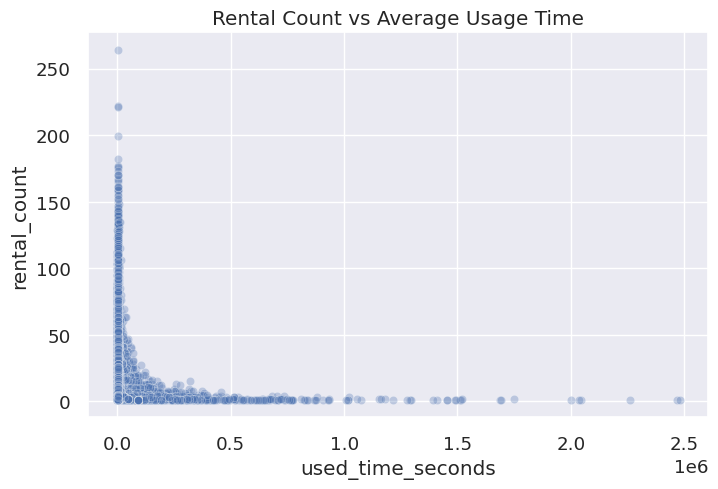

In [17]:
# -----------------------------------------------------------
# 7. 사용시간 분석
# -----------------------------------------------------------
df["used_time_seconds"] = pd.to_timedelta(df["used_time(avg)"]).dt.total_seconds()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="used_time_seconds", y="rental_count", alpha=0.3)
plt.title("Rental Count vs Average Usage Time")
plt.show()


### 상관관계 Heatmap

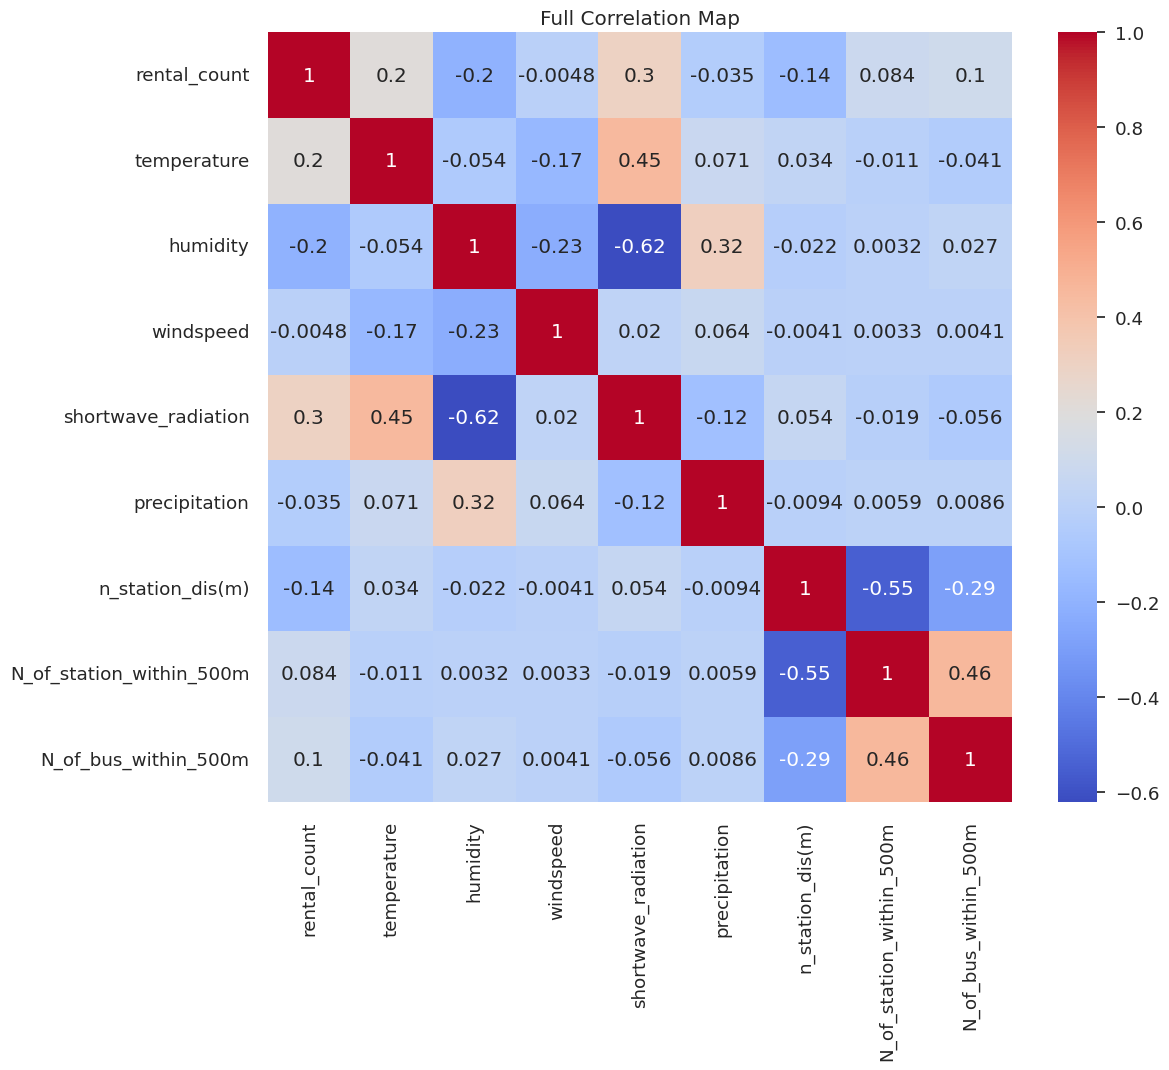

In [19]:

# -----------------------------------------------------------
# 8. 상관관계 Heatmap
# -----------------------------------------------------------
corr_cols = ["rental_count","temperature","humidity","windspeed",
             "shortwave_radiation","precipitation","n_station_dis(m)",
             "N_of_station_within_500m","N_of_bus_within_500m"]

plt.figure(figsize=(12,10))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Full Correlation Map")
plt.show()
